In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

from scipy import stats

%matplotlib inline

Welcome to JupyROOT 6.12/06


In [2]:
np.random.seed(12345678)  #fix random seed to get the same result
n1 = 200  # size of first sample
n2 = 300  # size of second sample

In [3]:
rvs1 = stats.norm.rvs(size=n1, loc=0., scale=1)
rvs2 = stats.norm.rvs(size=n2, loc=0.5, scale=1.5)
stats.ks_2samp(rvs1, rvs2)

Ks_2sampResult(statistic=0.20833333333333337, pvalue=4.667497551580699e-05)

Lets test the statistical compatability of the x-distributions of our histograms. In order to do this, we first need to import the file.

In [4]:
f = r.TFile("./Calo2Projections.root")
f.cd()
f.ls()

TFile**		./Calo2Projections.root	
 TFile*		./Calo2Projections.root	
  KEY: TH3D	h1;1	h1
  KEY: TH3D	h2;1	h2
  KEY: TH3D	h3;1	h3
  KEY: TH3D	h4;1	h4
  KEY: TH3D	h5;1	h5
  KEY: TH3D	h6;1	h6
  KEY: TH3D	h7;1	h7
  KEY: TH3D	h8;1	h8
  KEY: TH3D	h9;1	h9
  KEY: TH3D	h10;1	h10
  KEY: TH3D	h11;1	h11
  KEY: TH3D	h12;1	h12
  KEY: TH3D	h13;1	h13
  KEY: TH3D	h14;1	h14
  KEY: TH3D	h15;1	h15
  KEY: TH3D	h16;1	h16
  KEY: TH3D	h17;1	h17
  KEY: TH3D	h18;1	h18
  KEY: TH3D	h19;1	h19
  KEY: TH3D	h20;1	h20
  KEY: TH3D	h21;1	h21
  KEY: TH3D	h22;1	h22
  KEY: TH3D	h23;1	h23
  KEY: TH3D	h24;1	h24


In [5]:
def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in r.gDirectory.GetListOfKeys()]
r.TFile.GetKeyNames = GetKeyNames

keyList = f.GetKeyNames("")
print ("\nKeys in file:", keyList)


Keys in file: ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']


In [6]:
#h = r.TH3D()
#f.GetObject(keyList[1], h)

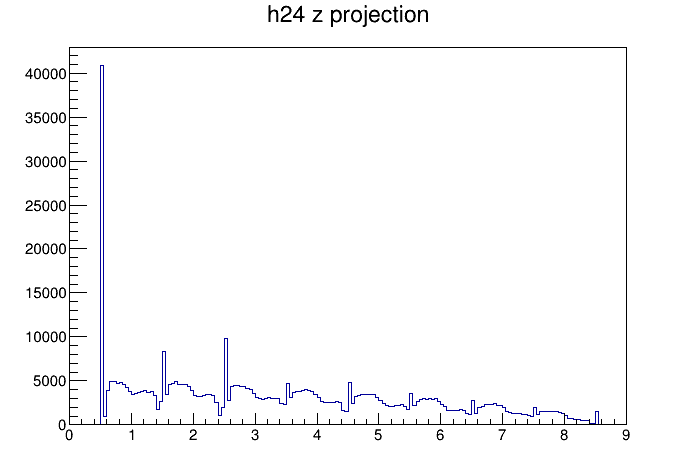

In [7]:
projectionVec = []
c = r.TCanvas()
for i in range(24):
    projectionVeci = []
    hi = r.TH3D()
    f.GetObject(keyList[i],hi)
    projI = hi.Project3D("z")
    projI.Draw()
    hSize = projI.GetNbinsX()-2
    for j in range(hSize):
        if(int(projI.GetBinContent(j)) > 0 and j > projI.FindBin(2) and j < projI.FindBin(7)):
            projectionVeci.append( projI.GetBinContent(j) )
    c.Draw()
    projectionVec.append( projectionVeci ) 
    
#print(projectionVec)

In [8]:
#Double check that the leading/trailing zeros have been screened out
ding = projectionVec[1]
print(ding)

[2941.0, 2792.0, 2621.0, 2690.0, 2579.0, 2489.0, 2008.0, 1051.0, 1564.0, 9879.0, 807.0, 2657.0, 3511.0, 3697.0, 3806.0, 3840.0, 3905.0, 3865.0, 3633.0, 3090.0, 2596.0, 2178.0, 2085.0, 2040.0, 2088.0, 2015.0, 1386.0, 416.0, 1667.0, 6287.0, 497.0, 2012.0, 2757.0, 2934.0, 2999.0, 3140.0, 3175.0, 3221.0, 3046.0, 2672.0, 2351.0, 1977.0, 1815.0, 1766.0, 1720.0, 1715.0, 1206.0, 459.0, 934.0, 5830.0, 722.0, 2337.0, 2736.0, 2836.0, 2971.0, 3071.0, 3015.0, 3029.0, 2826.0, 2439.0, 2106.0, 1650.0, 1464.0, 1318.0, 1321.0, 1248.0, 854.0, 299.0, 835.0, 3829.0, 433.0, 1579.0, 1945.0, 2030.0, 2098.0, 2270.0, 2270.0, 2226.0, 2126.0, 1929.0, 1736.0, 1396.0, 1221.0, 1144.0, 1098.0, 1099.0, 893.0, 315.0, 692.0, 1811.0, 337.0, 953.0, 1230.0, 1189.0, 1263.0, 1251.0, 1283.0, 1238.0, 1176.0]


Now that we have our 1D datasets, lets compare the data from the calos which should be similar: 8, 14, and 20

In [9]:
print(stats.ks_2samp(projectionVec[8-1],projectionVec[20-1]))
print(stats.ks_2samp(projectionVec[8-1],projectionVec[14-1]))
print(stats.ks_2samp(projectionVec[14-1],projectionVec[20-1]))

Ks_2sampResult(statistic=0.1616161616161616, pvalue=0.13619189865976938)
Ks_2sampResult(statistic=0.1616161616161616, pvalue=0.13619189865976938)
Ks_2sampResult(statistic=0.08080808080808083, pvalue=0.8902129738887896)


In [10]:
print(stats.ks_2samp(projectionVec[2-1],projectionVec[8-1]))
print(stats.ks_2samp(projectionVec[2-1],projectionVec[14-1]))
print(stats.ks_2samp(projectionVec[2-1],projectionVec[20-1]))

Ks_2sampResult(statistic=0.3030303030303031, pvalue=0.00015819932984883692)
Ks_2sampResult(statistic=0.3838383838383838, pvalue=5.246613722284995e-07)
Ks_2sampResult(statistic=0.3939393939393939, pvalue=2.3385418354783277e-07)


In [11]:
statsVec = []
for i in range(24):
    for j in range(24):
        if(i >= j):
#        if(True):
#            print(i, j,stats.ks_2samp(projectionVec[i],projectionVec[j])[1])
            statsVec.append((i+1, j+1,stats.ks_2samp(projectionVec[i],projectionVec[j])[0],stats.ks_2samp(projectionVec[i],projectionVec[j])[1]))
#print(statsVec)

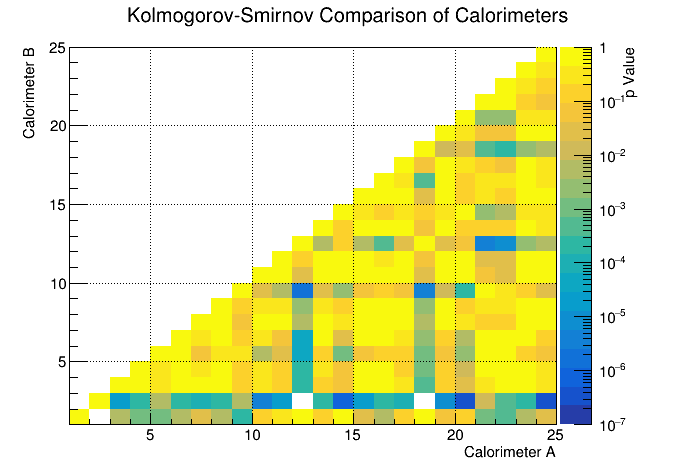

In [12]:
#hist2d.Delete()
hist2d = r.TH2D('Kolmogorov-Smirnov Comparison of Calorimeters','hist2d',24,1,25,24,1,25)
for calo1, calo2, ks, p in statsVec:
    hist2d.Fill(calo1,calo2,p)
hist2d.Draw("COLZ")
hist2d.SetTitle("Kolmogorov-Smirnov Comparison of Calorimeters")
hist2d.GetXaxis().SetTitle("Calorimeter A")
hist2d.GetYaxis().SetTitle("Calorimeter B")
hist2d.GetZaxis().SetTitle("p Value")
c.SetLogz()
hist2d.GetZaxis().SetRangeUser(0.0000001,1)
c.SetGridx()
c.SetGridy()
c.SetRightMargin(0.2)
c.Draw()

In [13]:
calo1 = 1
calo2 = 9
print(stats.ks_2samp(projectionVec[calo1-1],projectionVec[calo2-1]))

Ks_2sampResult(statistic=0.29292929292929293, pvalue=0.0002938340217806686)


In [14]:
for calo1, calo2, ks, p in statsVec:
    if p < 0.001:
        print(calo1,calo2)

2 1
3 2
4 1
4 2
5 1
6 2
7 2
8 2
9 1
10 2
11 2
12 2
12 3
12 4
12 5
12 6
12 9
13 2
14 2
14 5
15 2
16 2
16 12
17 2
18 2
18 3
18 4
18 5
18 9
18 16
19 2
20 2
20 9
21 1
21 12
21 18
22 1
22 2
22 12
22 18
23 2
24 2


In [15]:
'''c2 = r.TCanvas()
hist2d.ProjectionX().Draw("hist")
c2.SetGridx()
c2.SetGridy()
c2.Draw()'''

'c2 = r.TCanvas()\nhist2d.ProjectionX().Draw("hist")\nc2.SetGridx()\nc2.SetGridy()\nc2.Draw()'

In [16]:
'''for i in range(len(projectionVec[1])):
    print(i,projectionVec[1][i])'''

'for i in range(len(projectionVec[1])):\n    print(i,projectionVec[1][i])'

[2941.0, 2792.0, 2621.0, 2690.0, 2579.0, 2489.0, 2008.0, 1051.0, 1564.0, 9879.0, 807.0, 2657.0, 3511.0, 3697.0, 3806.0, 3840.0, 3905.0, 3865.0, 3633.0, 3090.0, 2596.0, 2178.0, 2085.0, 2040.0, 2088.0, 2015.0, 1386.0, 416.0, 1667.0, 6287.0, 497.0, 2012.0, 2757.0, 2934.0, 2999.0, 3140.0, 3175.0, 3221.0, 3046.0, 2672.0, 2351.0, 1977.0, 1815.0, 1766.0, 1720.0, 1715.0, 1206.0, 459.0, 934.0, 5830.0, 722.0, 2337.0, 2736.0, 2836.0, 2971.0, 3071.0, 3015.0, 3029.0, 2826.0, 2439.0, 2106.0, 1650.0, 1464.0, 1318.0, 1321.0, 1248.0, 854.0, 299.0, 835.0, 3829.0, 433.0, 1579.0, 1945.0, 2030.0, 2098.0, 2270.0, 2270.0, 2226.0, 2126.0, 1929.0, 1736.0, 1396.0, 1221.0, 1144.0, 1098.0, 1099.0, 893.0, 315.0, 692.0, 1811.0, 337.0, 953.0, 1230.0, 1189.0, 1263.0, 1251.0, 1283.0, 1238.0, 1176.0]


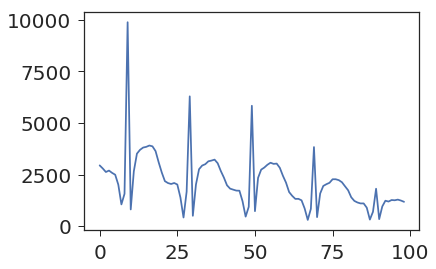

In [17]:
ding = projectionVec[1]
print(ding)
plt.plot(ding)

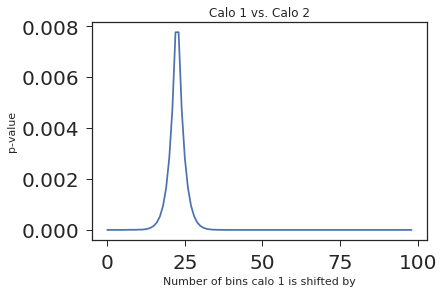

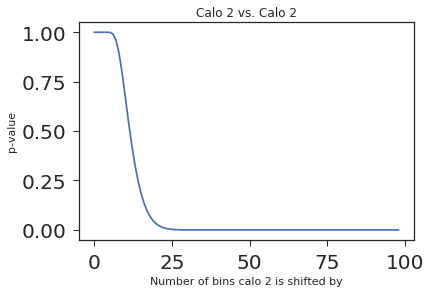

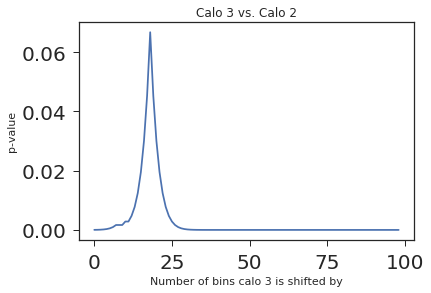

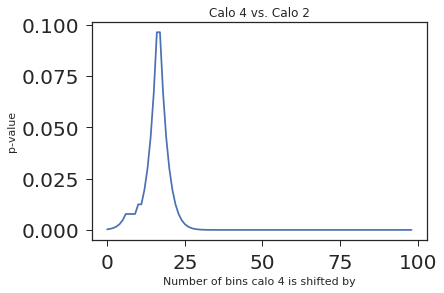

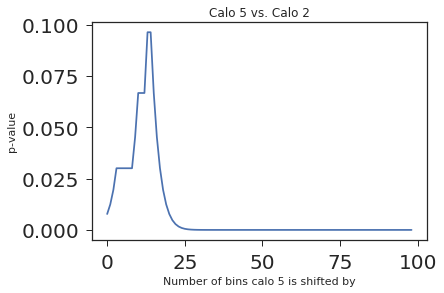

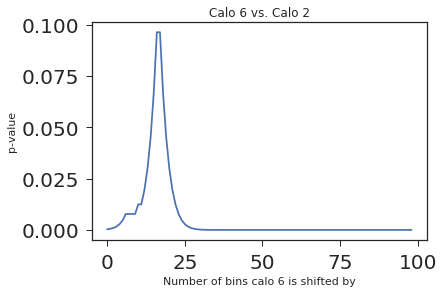

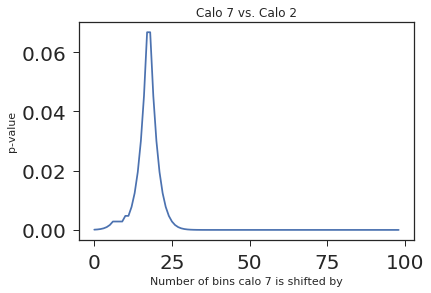

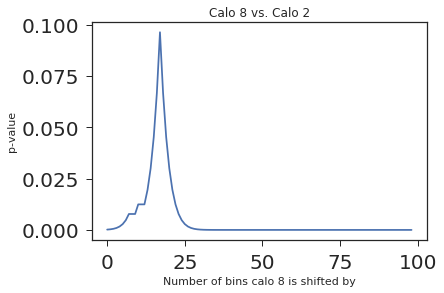

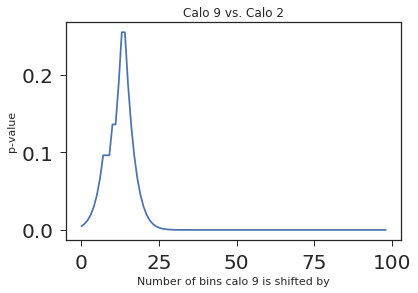

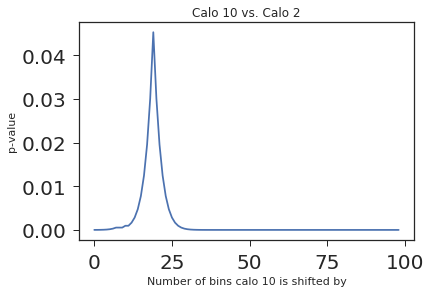

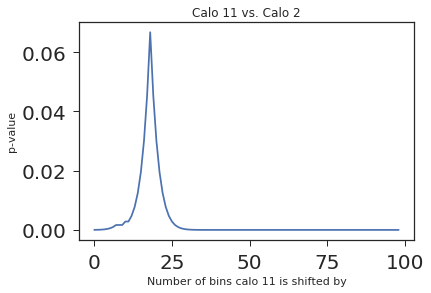

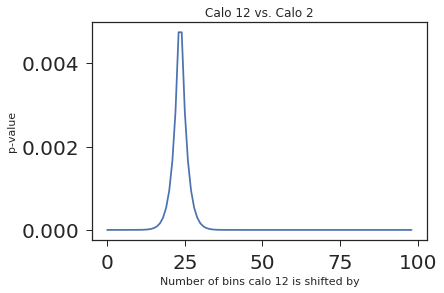

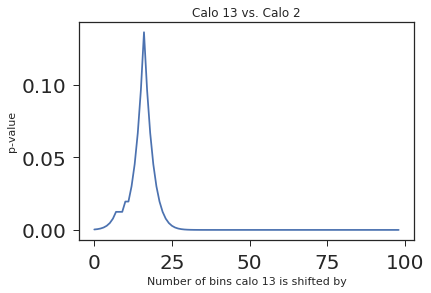

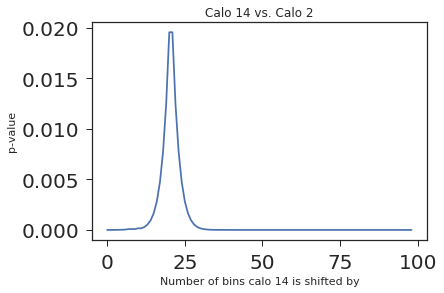

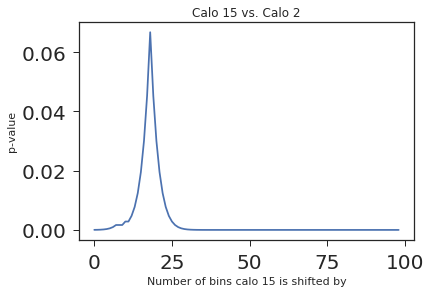

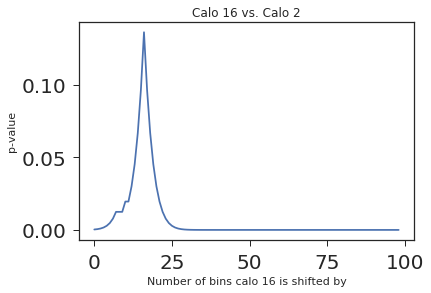

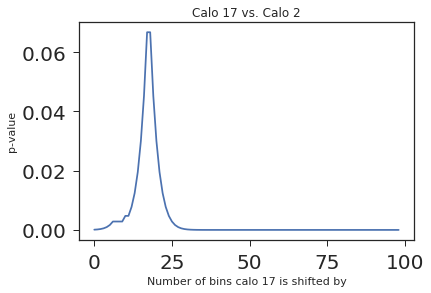

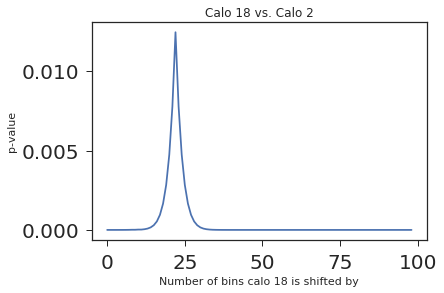

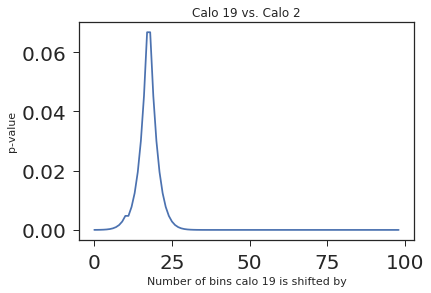

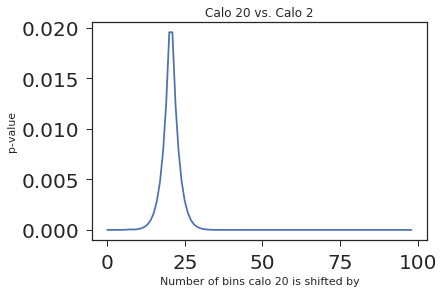

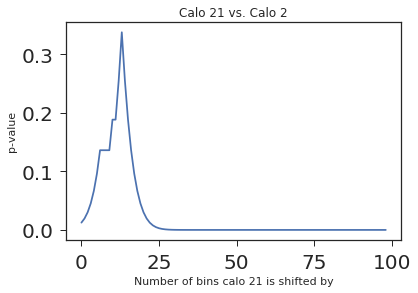

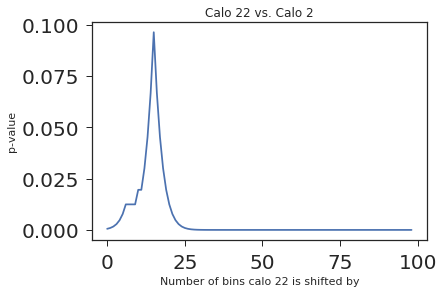

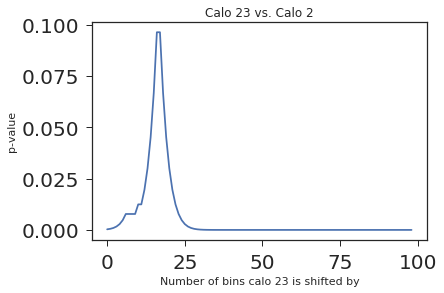

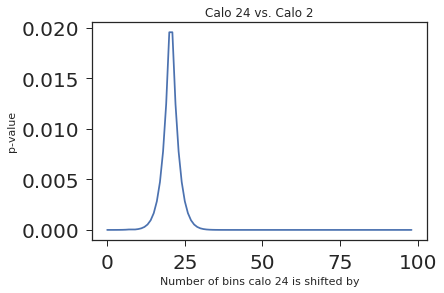

In [18]:
indexShiftVec = []

for calonum in range(1,25):
#    calonum = 3
    pVec_8_2_Cut = []
    calo8 = projectionVec[calonum-1]
    calo2 = projectionVec[2-1]
    
    for i in range(len(calo8)):
                
        if (i % 1 == 0):
            calo8Cut = calo8[i:] + [0] * i
            pVec_8_2_Cut.append(stats.ks_2samp(calo8Cut,calo2)[1])

    indexShiftVec.append(pVec_8_2_Cut.index(max(pVec_8_2_Cut)))        
            
    plt.plot(pVec_8_2_Cut)
    plt.title('Calo '+str(calonum)+" vs. Calo 2")
    plt.xlabel("Number of bins calo "+str(calonum)+" is shifted by")
    plt.ylabel("p-value")
#    plt.ylim(0,0.5)
#    plt.savefig("../images/KS/calo"+str(calonum).zfill(2)+"_vs_calo02.png",bbox_inches='tight')
    plt.show()
#indexShiftVec.remove(0)

In [19]:
print(indexShiftVec)

[23, 1, 18, 16, 13, 16, 18, 17, 13, 19, 18, 23, 16, 20, 18, 16, 17, 22, 18, 20, 13, 15, 17, 21]


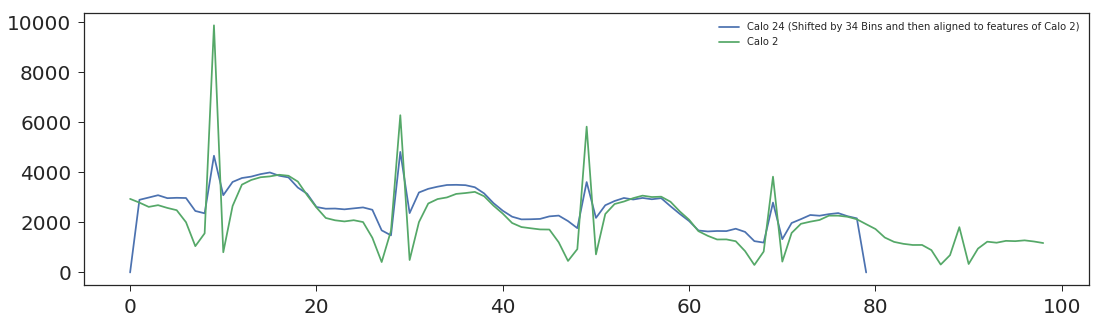

In [20]:
fig, ax = plt.subplots(figsize=(18, 5))
plt.plot([0]*1 + projectionVec[24-1][21:] + [0]*1)
plt.plot(projectionVec[2-1])
ax.legend(['Calo 24 (Shifted by 34 Bins and then aligned to features of Calo 2)','Calo 2'])
plt.show()

In [21]:
print(indexShiftVec)
print(np.mean(indexShiftVec),"+/-",np.std(indexShiftVec))
binShift = np.mean(indexShiftVec)
binShiftErr = np.std(indexShiftVec)

[23, 1, 18, 16, 13, 16, 18, 17, 13, 19, 18, 23, 16, 20, 18, 16, 17, 22, 18, 20, 13, 15, 17, 21]
17.0 +/- 4.339738855430512


This shows that the value of calo 2 is shifted from the value of the average calo by this amount. Now can we convert that to crystals?

21 41


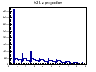

In [22]:
c3 = r.TCanvas("c3","c3",100,100)
projI.Draw()
print(projI.FindBin(1),projI.FindBin(2))
binsPerCrystal = projI.FindBin(2) - projI.FindBin(1)
c3.Draw()

This means that there are 20 bins to a crystal. Therefore the shift in terms of crystals is:

In [23]:
print(binShift/binsPerCrystal,"+/-", binShiftErr/binsPerCrystal)

0.85 +/- 0.21698694277152558


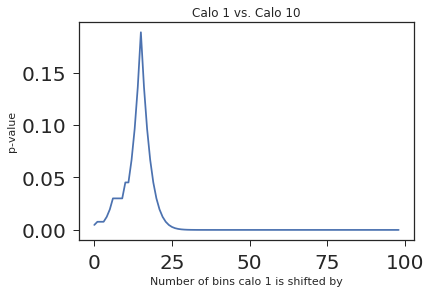

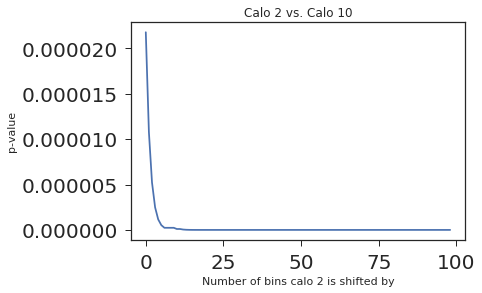

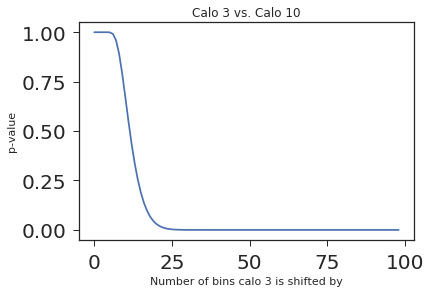

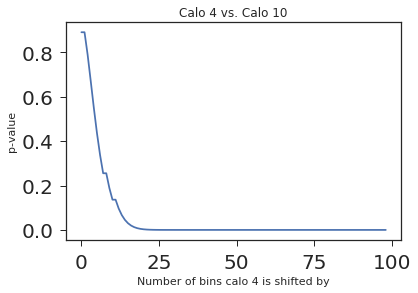

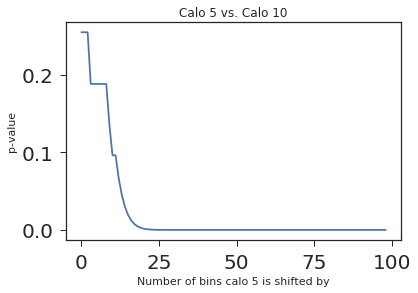

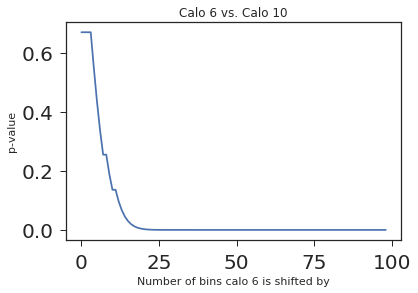

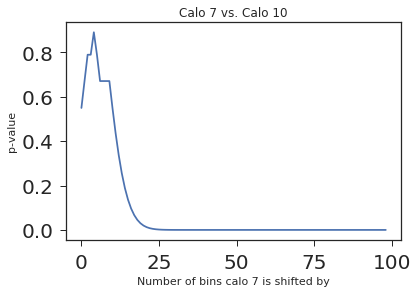

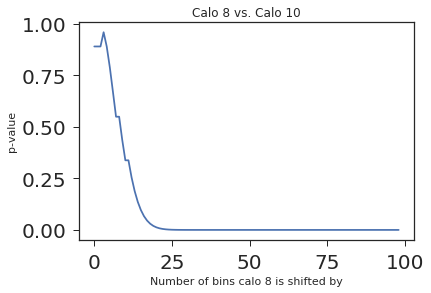

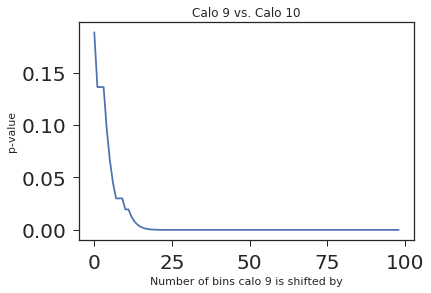

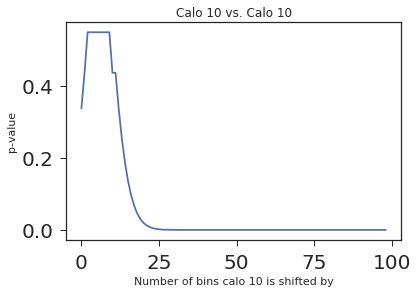

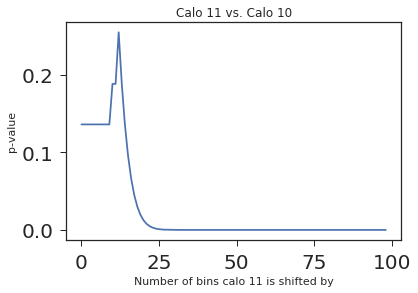

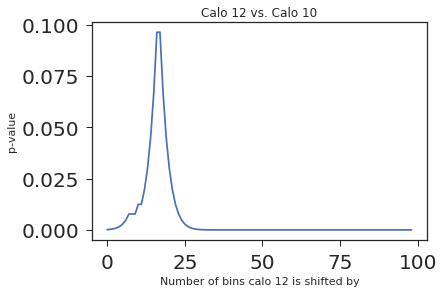

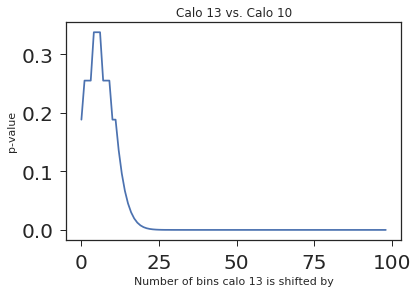

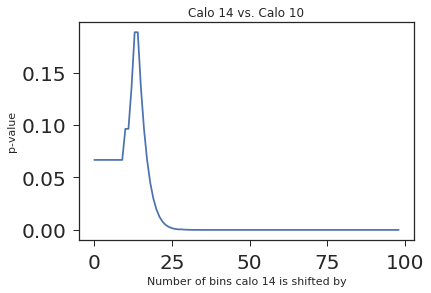

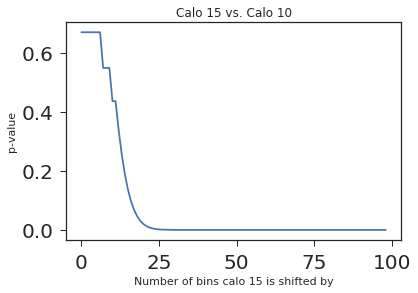

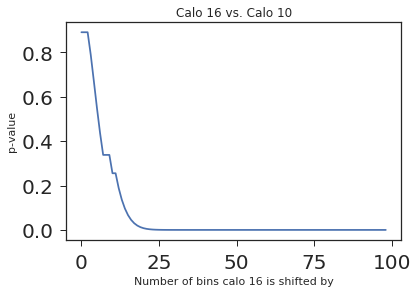

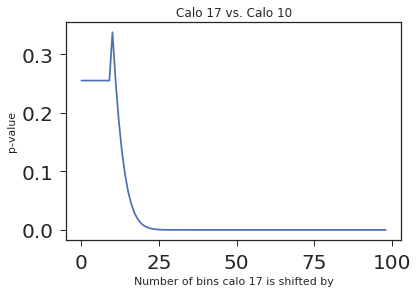

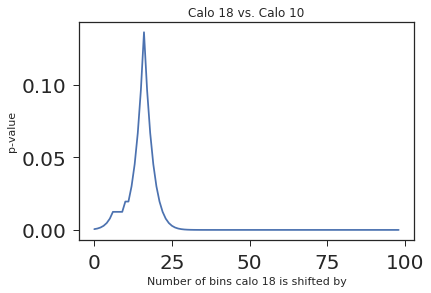

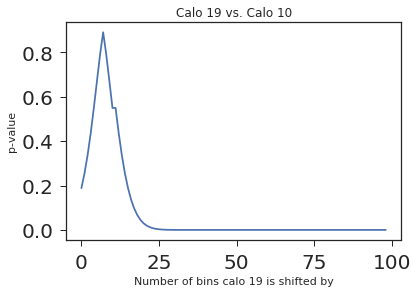

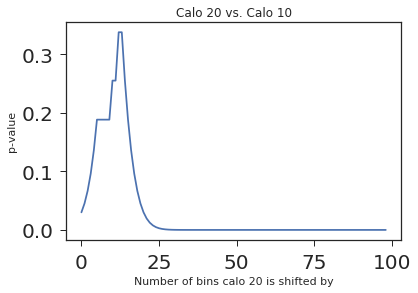

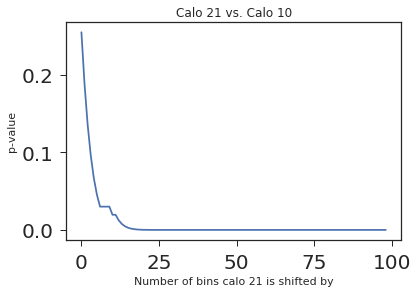

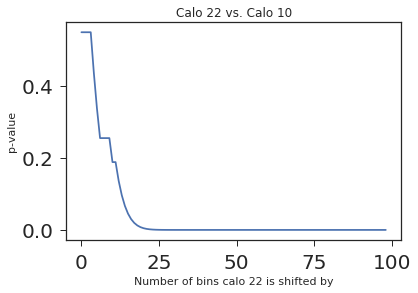

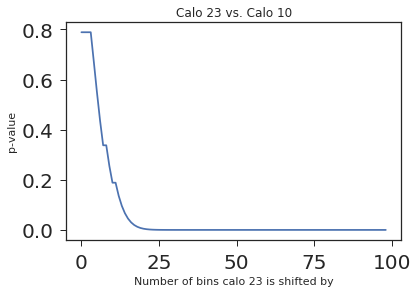

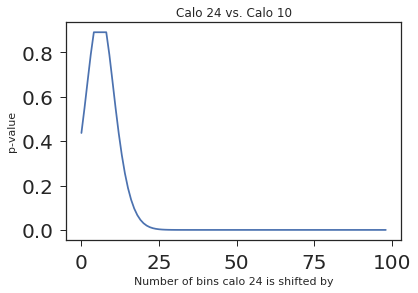

In [24]:
for calonum in range(1,25):
    pVec_8_2_Cut = []
    calo8 = projectionVec[calonum-1]
    
    for i in range(len(calo8)):
                
        if (i % 1 == 0):
            calo8Cut = calo8[i:] + [0] * i
            pVec_8_2_Cut.append(stats.ks_2samp(calo8Cut,projectionVec[3-1])[1])

    plt.plot(pVec_8_2_Cut)
    plt.title('Calo '+str(calonum)+" vs. Calo 10")
    plt.xlabel("Number of bins calo "+str(calonum)+" is shifted by")
    plt.ylabel("p-value")
#    plt.ylim(0,0.5)
#    plt.savefig("../images/KS/calo"+str(calonum).zfill(2)+"_vs_calo10.png",bbox_inches='tight')
    plt.show()

In [25]:
indexShiftVecAll = []

for j in range(1,25):
    indexShiftVeci = []
    for calonum in range(1,25):
        pVec_8_2_Cut = []
        calo8 = projectionVec[calonum-1]

        for i in range(len(calo8)):
            if (i % 1 == 0):
                calo8Cut = calo8[i:] + [0] * i
                pVec_8_2_Cut.append(stats.ks_2samp(calo8Cut,projectionVec[j-1])[1])

        indexShiftVeci.append(pVec_8_2_Cut.index(max(pVec_8_2_Cut)))        
    indexShiftVecAll.append(indexShiftVeci)
#    indexShiftVec.remove(0)

print(indexShiftVecAll)

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], [23, 1, 18, 16, 13, 16, 18, 17, 13, 19, 18, 23, 16, 20, 18, 16, 17, 22, 18, 20, 13, 15, 17, 21], [15, 0, 1, 0, 0, 0, 4, 3, 0, 3, 12, 16, 5, 13, 0, 0, 10, 16, 7, 13, 0, 0, 0, 4], [15, 0, 0, 1, 0, 0, 6, 4, 0, 6, 10, 17, 10, 12, 3, 2, 10, 15, 7, 12, 0, 0, 4, 6], [15, 0, 7, 6, 1, 5, 10, 6, 0, 13, 12, 17, 10, 15, 10, 7, 10, 15, 9, 14, 3, 3, 6, 10], [14, 0, 0, 0, 0, 1, 5, 4, 0, 6, 10, 18, 1, 10, 5, 5, 6, 14, 7, 13, 0, 0, 5, 6], [10, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 13, 0, 10, 0, 0, 1, 13, 0, 5, 0, 0, 0, 3], [14, 0, 0, 0, 0, 0, 2, 1, 0, 7, 10, 15, 0, 12, 3, 0, 10, 14, 2, 10, 0, 0, 0, 4], [17, 0, 6, 2, 0, 0, 12, 6, 1, 14, 14, 20, 12, 16, 14, 10, 14, 19, 13, 15, 0, 1, 4, 12], [10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 12, 0, 10, 0, 0, 0, 10, 0, 1, 0, 0, 0, 0], [6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 7, 0, 2, 0, 0, 0, 10, 0, 4, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [7, 0, 0, 0, 0, 0, 1, 0, 

1 0.25
     -> [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
2 17.0
     -> [23, 1, 18, 16, 13, 16, 18, 17, 13, 19, 18, 23, 16, 20, 18, 16, 17, 22, 18, 20, 13, 15, 17, 21]
3 5.083333333333333
     -> [15, 0, 1, 0, 0, 0, 4, 3, 0, 3, 12, 16, 5, 13, 0, 0, 10, 16, 7, 13, 0, 0, 0, 4]
4 5.833333333333333
     -> [15, 0, 0, 1, 0, 0, 6, 4, 0, 6, 10, 17, 10, 12, 3, 2, 10, 15, 7, 12, 0, 0, 4, 6]
5 8.5
     -> [15, 0, 7, 6, 1, 5, 10, 6, 0, 13, 12, 17, 10, 15, 10, 7, 10, 15, 9, 14, 3, 3, 6, 10]
6 5.416666666666667
     -> [14, 0, 0, 0, 0, 1, 5, 4, 0, 6, 10, 18, 1, 10, 5, 5, 6, 14, 7, 13, 0, 0, 5, 6]
7 2.4166666666666665
     -> [10, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 13, 0, 10, 0, 0, 1, 13, 0, 5, 0, 0, 0, 3]
8 4.333333333333333
     -> [14, 0, 0, 0, 0, 0, 2, 1, 0, 7, 10, 15, 0, 12, 3, 0, 10, 14, 2, 10, 0, 0, 0, 4]
9 9.25
     -> [17, 0, 6, 2, 0, 0, 12, 6, 1, 14, 14, 20, 12, 16, 14, 10, 14, 19, 13, 15, 0, 1, 4, 12]
10 1.8333333333333333
     -> [10, 0, 0, 0, 0, 0, 0, 0, 0, 1, 

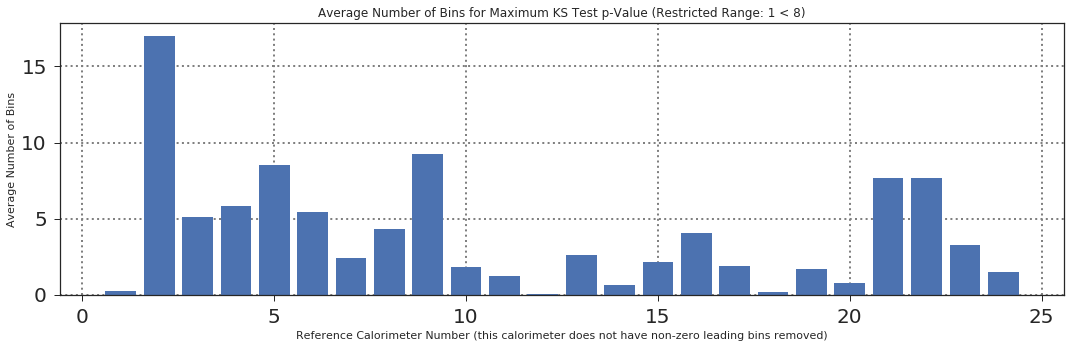

In [26]:
meanVecAll = []
caloVec = []
for i,indexShiftVeci in enumerate(indexShiftVecAll):
    print(i+1 ,np.mean(indexShiftVeci))
    print("     ->", indexShiftVeci)
#    meanVecAll.append(np.count_nonzero(indexShiftVeci))
    meanVecAll.append(np.mean(indexShiftVeci))
    caloVec.append(i+1)

fig, ax = plt.subplots(figsize=(18, 5))
ax.grid(color='grey', linestyle=':', linewidth=2)
plt.bar(caloVec,meanVecAll)
plt.title('Average Number of Bins for Maximum KS Test p-Value (Restricted Range: 1 < 8)')
plt.xlabel("Reference Calorimeter Number (this calorimeter does not have non-zero leading bins removed)")
plt.ylabel("Average Number of Bins")
plt.show()

In [27]:
print(meanVecAll)

[0.25, 17.0, 5.083333333333333, 5.833333333333333, 8.5, 5.416666666666667, 2.4166666666666665, 4.333333333333333, 9.25, 1.8333333333333333, 1.25, 0.041666666666666664, 2.5833333333333335, 0.6666666666666666, 2.1666666666666665, 4.083333333333333, 1.9166666666666667, 0.16666666666666666, 1.7083333333333333, 0.7916666666666666, 7.666666666666667, 7.666666666666667, 3.2916666666666665, 1.5]


In [29]:
meanVecAll_1_8 = [0.20833333333333334, 18.791666666666668, 6.291666666666667, 7.0, 16.125, 7.708333333333333, 3.625, 6.083333333333333, 10.583333333333334, 3.5, 1.0833333333333333, 0.0, 2.3333333333333335, 0.75, 3.625, 4.333333333333333, 2.375, 0.041666666666666664, 1.5833333333333333, 1.3333333333333333, 8.375, 10.958333333333334, 2.7916666666666665, 2.1666666666666665]

In [30]:
print(meanVecAll_1_8)

[0.20833333333333334, 18.791666666666668, 6.291666666666667, 7.0, 16.125, 7.708333333333333, 3.625, 6.083333333333333, 10.583333333333334, 3.5, 1.0833333333333333, 0.0, 2.3333333333333335, 0.75, 3.625, 4.333333333333333, 2.375, 0.041666666666666664, 1.5833333333333333, 1.3333333333333333, 8.375, 10.958333333333334, 2.7916666666666665, 2.1666666666666665]


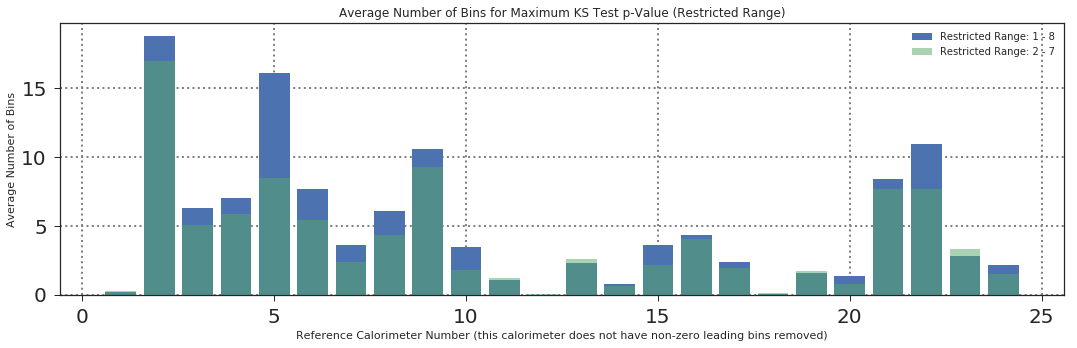

In [40]:
fig, ax = plt.subplots(figsize=(18, 5))
ax.grid(color='grey', linestyle=':', linewidth=2)
plt.bar(caloVec,meanVecAll_1_8)
plt.bar(caloVec,meanVecAll, alpha = 0.5)
plt.title('Average Number of Bins for Maximum KS Test p-Value (Restricted Range)')
plt.xlabel("Reference Calorimeter Number (this calorimeter does not have non-zero leading bins removed)")
plt.ylabel("Average Number of Bins")
ax.legend(['Restricted Range: 1 - 8','Restricted Range: 2 - 7'])
plt.show()